## O(n^2) algorithms (selection, bubble, insertion)

    I. Count the number of comparisons (selection vs bubble vs insertion)
        (1) Best case comparison (pre sorted sequences)
        (2) Worst case comparison (reverse sorted sequences)
        (3) Average case comparison (random numbers)

### Selection Sort

In [7]:
best_case_ = [1,2,3,4,5,6,7,8,9,10];
worst_case_ = [10,9,8,7,6,5,4,3,2,1];
average_case_ = [5,4,9,10,8,6,2,1,3,7];
selection = [10,48,29,47,15,3,41,11,19,4,27,27,23,12,45,44,34,25,41,20]
def selection_sort(collection):
    counter = 0;
    length = len(collection)
    for i in range(length):
        least = i
        for k in range(i + 1, length):
            counter += 1
            if collection[k] < collection[least]:
                least = k
        collection[least], collection[i] = (
            collection[i], collection[least]
        )
    return counter, collection
print("Average Case: %s %s" % selection_sort(average_case_))
print("Best Case: %s %s" % selection_sort(best_case_))
print("Worst Case:  %s %s" % selection_sort(worst_case_)) 
print("Test Case:  %s %s" % selection_sort(selection)) 

Average Case: 45 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Best Case: 45 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Worst Case:  45 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Test Case:  190 [3, 4, 10, 11, 12, 15, 19, 20, 23, 25, 27, 27, 29, 34, 41, 41, 44, 45, 47, 48]


### Insertion Sort

In [1]:
best_case1 = [1,2,3,4,5,6,7,8,9,10];
worst_case1 = [10,9,8,7,6,5,4,3,2,1];
average_case1 = [5,4,9,10,8,6,2,1,3,7];
selection_ = [10,48,29,47,15,3,41,11,19,4,27,27,23]
sample = [4,9,3,2,7]
def insertion_sort(array, gap):
    comparisons = 0
    for i in range(gap, len(array)):
        comparisons += 1
        val = array[i]
        j = i
        while j >= gap and array[j - gap] > val:
            array[j] = array[j - gap]
            j -= gap
            comparisons +=1
        array[j] = val

    return comparisons


insertion_sort(best_case1, 1)

9

In [58]:
best_case2 = [1,2,3,4,5,6,7,8,9,10];
worst_case2 = [10,9,8,7,6,5,4,3,2,1];
average_case2 = [5,4,9,10,8,6,2,1,3,7];
selection = [10,48,29,47,15,3,41,11,19,4,27,27,23,12,45,44,34,25,41,20]

def bubble_sort(data):
    count = 0
    while True:
        swapped = False
        for i in range(1, len(data)):
            count += 1
            if data[i-1] > data[i]:
                data[i-1], data[i] = data[i], data[i-1]
                swapped = True
        if not swapped:
            break
    return count, data

print("Best Case: %s %s" % bubble_sort(best_case2))
print("Worst Case:  %s %s" % bubble_sort(worst_case2))
print("Average Case: %s %s" % bubble_sort(average_case2))

Best Case: 9 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Worst Case:  90 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Average Case: 72 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


## Shell sort optimization 

    I. Insertion sort VS shell sort with insertion sort as subroutine
        (1) on pre sorted sequences
        (2) reverse sorted sequnces
        (3) random numbers
    
    II. Insertion sort using different gaps (random numbers)
        (1) Shell's gaps vs. Ciura's gaps

### Insertion Sort VS. Shell Insertion Sort

In [2]:
def test_cases_init():
    ranges = [10,20,50,100,150,200,250,300]
    presorted = []
    reversedsorted = []

    for r in ranges:
        i = 1
        arr = []
        while (i <= r):
            arr.append(i)
            i +=1
        presorted.append(arr)
        reversedsorted.append(arr[::-1])

    return presorted, reversedsorted

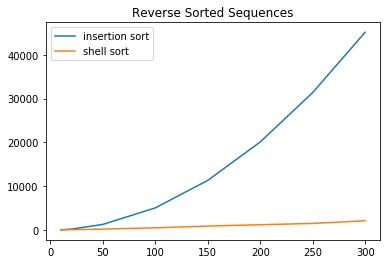

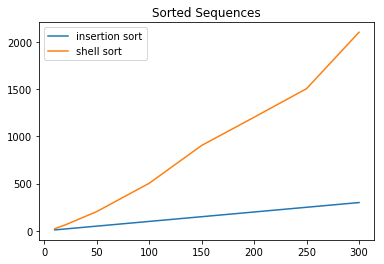

In [9]:
def shell_vs_insertion_eval():
    x_values = [10,20,50,100,150,200,250,300]
    # no. of comparisons
    shell_y_values = []
    insertion_y_values = []

    test_cases = test_cases_init()
    presorted = test_cases[0]
    reversedsorted = test_cases[1]
    #random = []

    ## REVERSE SORTED SEQUENCES
    for case in reversedsorted:
        result = insertion_sort(case,1)
        insertion_y_values.append(result)

    plt.plot(x_values, insertion_y_values)

    presorted = test_cases[1]
    for case in reversedsorted:
        result = shell_sort_shell(case)
        shell_y_values.append(result[3])

    plt.plot(x_values, shell_y_values)
    plt.title("Reverse Sorted Sequences")
    plt.legend(['insertion sort','shell sort'], loc='upper left')
    plt.show()

    ## PRESORTED SEQUENCES
    insertion_y_values = []
    shell_y_values = []
    for case in presorted:
        result = insertion_sort(case,1)
        insertion_y_values.append(result)

    plt.plot(x_values, insertion_y_values)

    presorted = test_cases[0]
    for case in presorted:
        result = shell_sort_shell(case)
        shell_y_values.append(result[3])

    plt.plot(x_values, shell_y_values)
    plt.title("Sorted Sequences")
    plt.legend(['insertion sort','shell sort'], loc='upper left')
    plt.show()


shell_vs_insertion_eval()

### Shell Sort (Shell's Gap Sequence)

In [4]:
def shell_sort_shell(array):
    comparisons = []
    unsortedness = []
    gaps = []

    gap = len(array) // 2
    commulative_comp = 0;

    gaps.append(0)

    ## SHELL SORT IMPLEMENTATION (SHELL'S GAP)
    # loop over the gaps
    while gap > 0:
        gaps.append(gap)
        unsortedness.append(get_Unsortedness(array))
        comparisons.append(commulative_comp)
        #print(commulative_comp, get_Unsortedness(array))
        commulative_comp += insertion_sort(array, gap)
        gap //= 2
    
    comparisons.append(commulative_comp)
    unsortedness.append(0)

    return gaps,comparisons,unsortedness,commulative_comp

### Shell Sort (Ciura's Gap Sequence)

In [5]:
def shell_sort_ciura(array):
    comparisons = []
    unsortedness = []
    gaps = [701, 301, 132, 57, 23, 10, 4, 1]

    commulative_comp = 0

    ## SHELL SORT IMPLEMENTATION (CIURA'S GAP)
    # loop over the gaps
    for gap in gaps:
        unsortedness.append(get_Unsortedness(array))
        comparisons.append(commulative_comp)
        commulative_comp += insertion_sort(array, gap)

    comparisons.append(commulative_comp)
    unsortedness.append(0)

    return gaps,comparisons,unsortedness

### Shell's Gap VS. Ciura's Gap

In [6]:
def test_case2():
    i = 1000
    arr = []
    while (i > 0):
        arr.append(i)
        i -=1
    
    return arr

def test_case():
    i = 1
    arr = []
    while (i <= 1000):
        arr.append(i)
        i +=1
    
    return arr

In [7]:
def get_Unsortedness(data):
    counter = 0;
    comparisons = 0
    for index in range(1, len(data)):
        counter+=1
        while 0 < index and data[index] < data[index - 1]:
            counter += 1
            index -= 1

    return counter

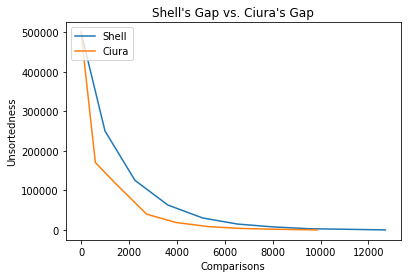

In [8]:
import matplotlib.pyplot as plt
def shell_vs_ciura_eval():

    shell_result = shell_sort_shell(test_case2())
    comparisons_x_shell = shell_result[1]
    usortedness_y_shell = shell_result[2]

    ciura_result = shell_sort_ciura(test_case2())
    comparisons_x_ciura = ciura_result[1]
    usortedness_y_ciura = ciura_result[2]


    plt.title("Shell's Gap vs. Ciura's Gap")
    plt.plot(comparisons_x_shell, usortedness_y_shell)
    plt.plot(comparisons_x_ciura, usortedness_y_ciura)
    plt.xlabel('Comparisons')
    plt.ylabel('Unsortedness')
        
    plt.legend(['Shell','Ciura'], loc='upper left')
    plt.show()

shell_vs_ciura_eval()

## Bucket sort optimization

    I. Bucket sort on different distributions (use insertion sort as subroutine)



In [82]:
import math
selection = [10,48,29,47,15,3,41,11,19,4,27,27,23,12,45,44,34,25,41,20]

DEFAULT_BUCKET_SIZE = 5

def bucketSort(myList, bucketSize=DEFAULT_BUCKET_SIZE):
    if(len(myList) == 0):
        print('You don\'t have any elements in array!')

    minValue = myList[0]
    maxValue = myList[0]

    # For finding minimum and maximum values
    for i in range(0, len(myList)):
        if myList[i] < minValue:
            minValue = myList[i]
        elif myList[i] > maxValue:
            maxValue = myList[i]

    # Initialize buckets
    bucketCount = math.floor((maxValue - minValue) / bucketSize) + 1
    buckets = []
    for i in range(0, bucketCount):
        buckets.append([])

    # For putting values in buckets
    for i in range(0, len(myList)):
        buckets[math.floor((myList[i] - minValue) / bucketSize)].append(myList[i])
        

    # Sort buckets and place back into input array
    sortedArray = []
    for i in range(0, len(buckets)):
        insertion_sort(buckets[i],1)
        for j in range(0, len(buckets[i])):
            sortedArray.append(buckets[i][j])

    for i in buckets.length():
            print("Random Case: %s " % bucketSort(selection))
    return sortedArray

print("Random Case: %s " % bucketSort(selection))

0 1 [3, 4]
-------------  1
0 1 [10, 11, 12]
0 1 [10, 11, 12]
-------------  2
-------------  0
0 1 [19, 20]
-------------  1
0 1 [27, 27, 23, 25]
2 3 [23, 27, 27, 25]
2 3 [23, 25, 27, 27]
-------------  7
-------------  0
-------------  0
0 1 [41, 41]
-------------  1
1 2 [45, 47, 44]
2 3 [44, 45, 47]
-------------  5
-------------  0
Random Case: [3, 4, 10, 11, 12, 15, 19, 20, 23, 25, 27, 27, 29, 34, 41, 41, 44, 45, 47, 48] 


## Radix sort optimization

    I. Radix sort with counting sort as subroutine vs radix sort with insertion sort
        (1) pre sorted
        (2) reverse sorted
        (3) Random

## Merge sort vs Quick Sort

    I. Merge sort vs quick sort on random numbers